In [13]:
import os
import pandas as pd
import re
from datetime import datetime

In [21]:

log_dir = r"C:\Users\bruno\OneDrive\Documentos\U\U4\U4_2\TFG\cvc_dir\log"

pattern_gen = re.compile(r"epo(\d+) <tr>-<gen>: l_dis=([\d.]+)-([\d.]+), l_rec=([\d.]+)-([\d.]+), cer=([\d.]+)-([\d.]+)-([\d.]+), ssim=([\d.]+), time=([\d.]+)")
pattern_tr = re.compile(r"epo(\d+) <tr>: cer=([\d.]+), ssim=([\d.]+)")
pattern_te = re.compile(r"epo(\d+) <te>: cer=([\d.]+), ssim=([\d.]+)")
data = []

In [6]:
for file_name in os.listdir(log_dir):
    if file_name.startswith("execution_") and file_name.endswith(".txt"):
        date_str = file_name[len("execution_"):-len(".txt")]
        try:
            date_obj = datetime.strptime(date_str, "%Y%m%d-%H%M%S")
        except:
            date_obj = datetime.strptime(date_str, "%Y%m%d_%H%M%S")
        with open(os.path.join(log_dir, file_name), 'r') as log_file:
            for line in log_file:
                match_gen = pattern_gen.match(line)
                match_tr = pattern_tr.match(line)
                match_te = pattern_te.match(line)
                
                if match_gen:
                    epoch, l_dis1, l_dis2, l_rec1, l_rec2, cer1, cer2, cer3, ssim, time = match_gen.groups()
                    data.append({
                        "Date": date_obj,
                        "Epoch": int(epoch),
                        "Type": "tr-gen",
                        "l_dis1": float(l_dis1),
                        "l_dis2": float(l_dis2),
                        "l_rec1": float(l_rec1),
                        "l_rec2": float(l_rec2),
                        "cer1": float(cer1),
                        "cer2": float(cer2),
                        "cer3": float(cer3),
                        "ssim": float(ssim),
                        "time": float(time)
                    })
                elif match_tr:
                    epoch, cer, ssim = match_tr.groups()
                    data.append({
                        "Date": date_obj,
                        "Epoch": int(epoch),
                        "Type": "tr",
                        "cer": float(cer),
                        "ssim": float(ssim)
                    })
                elif match_te:
                    epoch, cer, ssim = match_te.groups()
                    data.append({
                        "Date": date_obj,
                        "Epoch": int(epoch),
                        "Type": "te",
                        "cer": float(cer),
                        "ssim": float(ssim)
                    })

In [5]:
df = pd.DataFrame(data)
df.sort_values(by="Date", inplace=True)
print(df)

output_file = os.path.join(log_dir, "log_summary.xlsx")
df.to_excel(output_file, index=False)
print(f"Summary saved to {output_file}")


                   Date  Epoch    Type    cer    ssim  l_dis1  l_dis2  l_rec1  \
0   2024-05-31 18:41:30      0      tr  70.46  0.1374     NaN     NaN     NaN   
1   2024-05-31 18:41:30      0      te  45.84  0.1474     NaN     NaN     NaN   
2   2024-05-31 23:49:15      0      tr   5.41  0.2774     NaN     NaN     NaN   
3   2024-05-31 23:49:15      0      te   0.50  0.2087     NaN     NaN     NaN   
4   2024-06-01 20:58:09      0      tr  80.02  0.1254     NaN     NaN     NaN   
..                  ...    ...     ...    ...     ...     ...     ...     ...   
395 2024-06-12 18:10:02      4      te   0.03  0.3537     NaN     NaN     NaN   
393 2024-06-12 18:10:02      4  tr-gen    NaN  0.2996    0.32    3.40    0.14   
403 2024-06-12 18:10:02      8  tr-gen    NaN  0.2940    0.32    3.22    0.09   
397 2024-06-12 18:10:02      5      tr   0.05  0.3179     NaN     NaN     NaN   
404 2024-06-12 18:10:02      8      tr   0.04  0.2940     NaN     NaN     NaN   

     l_rec2  cer1  cer2  ce

In [4]:
%pip install openpyxl


   ---------------------------------------- 0.0/251.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.4 kB ? eta -:--:--
   -------------------------- ------------- 163.8/251.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 251.4/251.4 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Sacar los mejores resultados de cada ejecucion

In [58]:
import os
import pandas as pd
import re
from datetime import datetime

# Directorio de logs
log_dir = r"C:\Users\bruno\OneDrive\Documentos\U\U4\U4_2\TFG\cvc_dir\log"

# Crear una lista para almacenar los datos
data = []

# Función para extraer el número de epoch de una cadena de texto
def extract_epoch(text):
    match = re.search(r'epo(\d+)', text)
    return int(match.group(1)) if match else None

# Leer los archivos de logs
for file_name in os.listdir(log_dir):
    if file_name.startswith("execution_") and file_name.endswith(".txt"):
        # Extraer la fecha del nombre del archivo
        date_str = file_name[len("execution_"):-len(".txt")]
        try:
            date_obj = datetime.strptime(date_str, "%Y%m%d-%H%M%S")
        except ValueError:
            date_obj = datetime.strptime(date_str, "%Y%m%d_%H%M%S")
        with open(os.path.join(log_dir, file_name), 'r') as log_file:
            for line in log_file:
                # Inicializar un diccionario para la línea actual
                log_entry = {
                    "Date": date_obj,
                    "Epoch": None,
                    "Type": None,
                    "l_dis1": None,
                    "l_dis2": None,
                    "l_rec1": None,
                    "l_rec2": None,
                    "cer1": None,
                    "cer2": None,
                    "cer3": None,
                    "cer": None,
                    "ssim": None,
                    "time": None
                }

                # Procesar la línea según su tipo
                if "<tr>-<gen>:" in line:
                    log_entry["Epoch"] = extract_epoch(line)
                    #print(log_entry.keys())
                    log_entry["Type"] = "tr-gen"
                    parts = re.split(r'[<>,=:\-]+', line)
                    #print(parts)
                    log_entry["l_dis1"] = float(parts[4])
                    log_entry["l_dis2"] = float(parts[5])
                    log_entry["l_rec1"] = float(parts[7])
                    log_entry["l_rec2"] = float(parts[8])
                    log_entry["cer1"] = float(parts[10])
                    log_entry["cer2"] = float(parts[11])
                    log_entry["cer3"] = float(parts[12])
                    log_entry["ssim"] = float(parts[14])
                    log_entry["time"] = float(parts[16])
                elif "<tr>:" in line:
                    log_entry["Epoch"] = extract_epoch(line)
                    log_entry["Type"] = "tr"
                    parts = re.split(r'[<>,:=\n\-]+', line)
                    #print(parts)
                    log_entry["cer"] = float(parts[3])
                    log_entry["ssim"] = float(parts[5].strip())

                elif "<te>:" in line:
                    log_entry["Epoch"] = extract_epoch(line)
                    log_entry["Type"] = "te"
                    parts = re.split(r'[<>,: = \n \-]+', line)
                    log_entry["cer"] = float(parts[3])
                    log_entry["ssim"] = float(parts[5].strip())
                print(log_entry)
                # Añadir el log_entry a los datos si tiene un Epoch (si se procesó alguna línea válida)
                if log_entry["Epoch"] is not None:
                    data.append(log_entry)

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Verificar si las columnas Date y Epoch existen antes de ordenar
if 'Date' in df.columns and 'Epoch' in df.columns:
    # Ordenar el DataFrame por fecha y época
    df.sort_values(by=["Date", "Epoch"], inplace=True)

    # Filtrar las últimas épocas de cada ejecución
    last_epochs = df.groupby("Date").tail(3)

    # Mostrar el DataFrame filtrado
    print(last_epochs)

    # Guardar el DataFrame en un archivo Excel
    output_file = os.path.join(log_dir, "last_epochs_summary.xlsx")
    last_epochs.to_excel(output_file, index=False)
    print(f"Summary saved to {output_file}")
else:
    print("Error: The DataFrame does not contain the required 'Date' or 'Epoch' columns.")


{'Date': datetime.datetime(2024, 5, 31, 18, 41, 30), 'Epoch': 0, 'Type': 'tr', 'l_dis1': None, 'l_dis2': None, 'l_rec1': None, 'l_rec2': None, 'cer1': None, 'cer2': None, 'cer3': None, 'cer': 70.46, 'ssim': 0.1374, 'time': None}
{'Date': datetime.datetime(2024, 5, 31, 18, 41, 30), 'Epoch': 0, 'Type': 'te', 'l_dis1': None, 'l_dis2': None, 'l_rec1': None, 'l_rec2': None, 'cer1': None, 'cer2': None, 'cer3': None, 'cer': 45.84, 'ssim': 0.1474, 'time': None}
{'Date': datetime.datetime(2024, 5, 31, 23, 49, 15), 'Epoch': 0, 'Type': 'tr', 'l_dis1': None, 'l_dis2': None, 'l_rec1': None, 'l_rec2': None, 'cer1': None, 'cer2': None, 'cer3': None, 'cer': 5.41, 'ssim': 0.2774, 'time': None}
{'Date': datetime.datetime(2024, 5, 31, 23, 49, 15), 'Epoch': 0, 'Type': 'te', 'l_dis1': None, 'l_dis2': None, 'l_rec1': None, 'l_rec2': None, 'cer1': None, 'cer2': None, 'cer3': None, 'cer': 0.5, 'ssim': 0.2087, 'time': None}
{'Date': datetime.datetime(2024, 6, 1, 20, 58, 9), 'Epoch': 0, 'Type': 'tr', 'l_dis1': 

C:\Users\bruno\AppData\Local\Temp\ipykernel_16168\2804810346.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels_named), y=list(counts_named), palette="viridis")


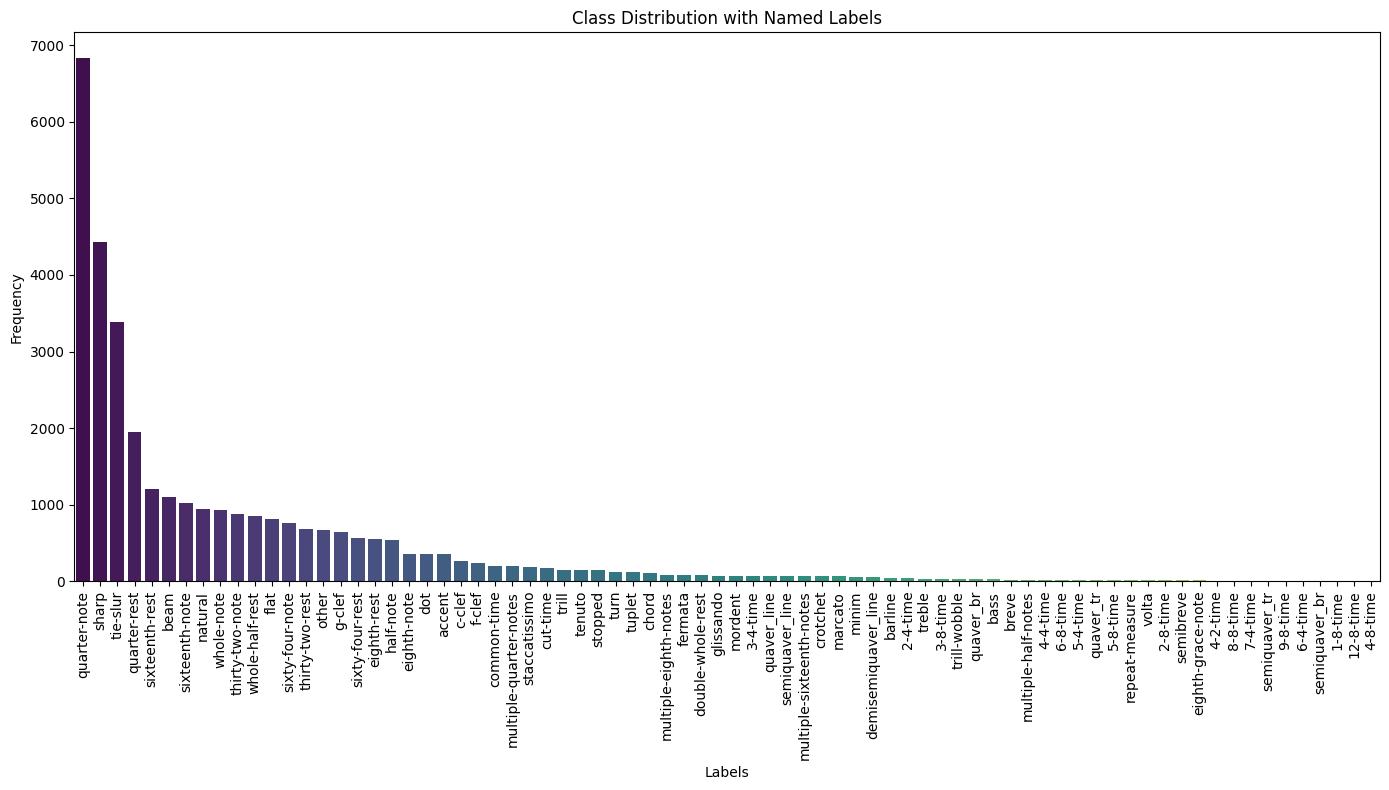

C:\Users\bruno\AppData\Local\Temp\ipykernel_16168\2804810346.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10_labels), y=list(top_10_counts), palette="viridis")


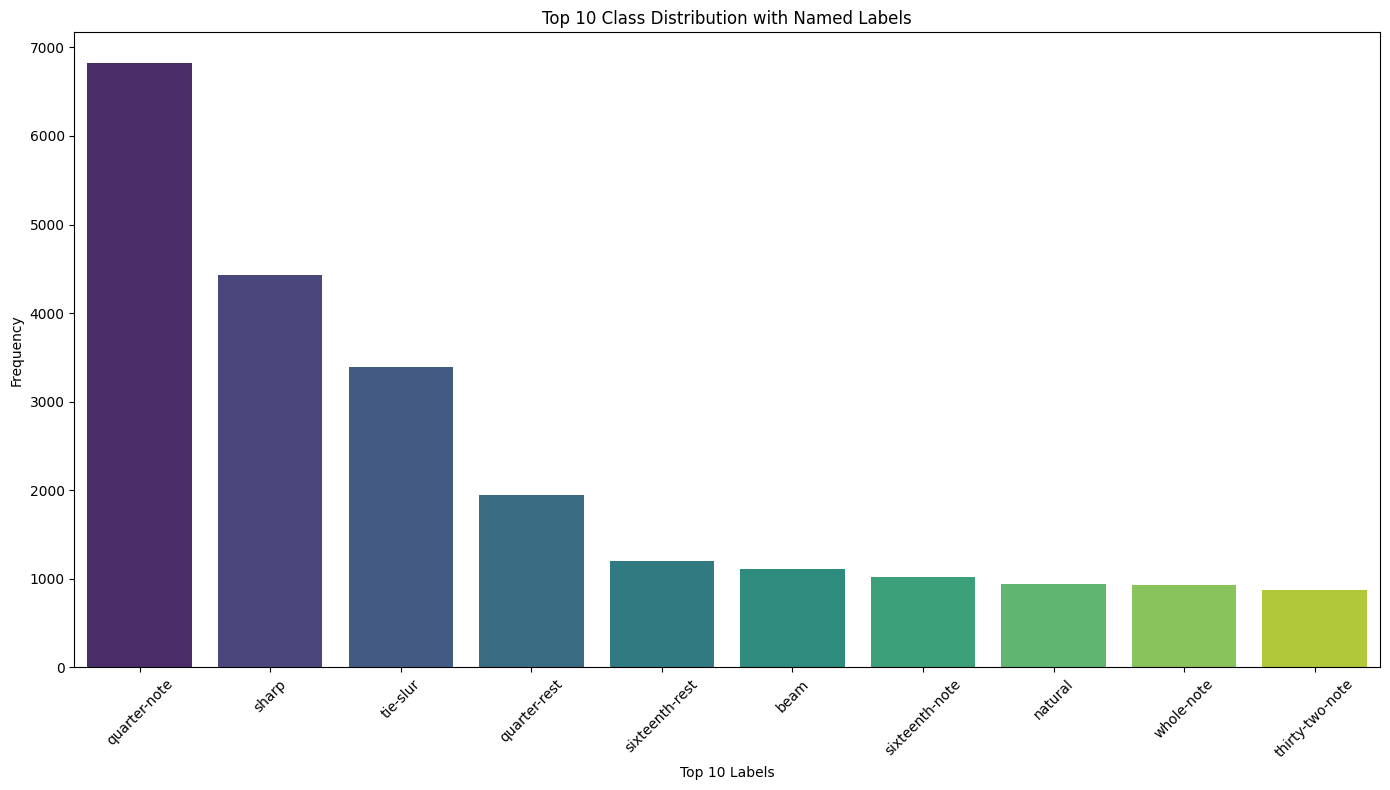

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Distribución de etiquetas proporcionada inicialmente
label_distribution_initial = Counter({
    70: 6829, 81: 4433, 91: 3386, 71: 1946, 83: 1200, 25: 1105, 82: 1019, 66: 938, 99: 926, 89: 874, 
    98: 856, 47: 817, 84: 763, 90: 685, 69: 667, 48: 643, 85: 559, 44: 547, 52: 543, 43: 354, 37: 353, 
    21: 353, 29: 268, 45: 235, 33: 203, 64: 192, 86: 186, 35: 177, 93: 145, 88: 145, 87: 140, 96: 123, 
    95: 121, 30: 100, 62: 82, 46: 82, 41: 79, 49: 73, 61: 72, 9: 69, 73: 68, 79: 67, 65: 67, 34: 64, 
    59: 61, 60: 56, 36: 48, 23: 39, 7: 34, 92: 30, 10: 26, 94: 22, 72: 22, 24: 21, 28: 18, 63: 18, 
    12: 17, 17: 15, 14: 13, 74: 12, 15: 12, 75: 11, 97: 11, 8: 10, 77: 9, 42: 9, 11: 6, 19: 6, 18: 5, 
    80: 5, 20: 3, 16: 2, 78: 2, 4: 1, 5: 1, 13: 1
})

# Mapeo index2letter proporcionado
index2letter = {
    0: 'PAD_TOKEN', 1: 'SOS_TOKEN', 2: 'EOS_TOKEN', 3: 'UNK_TOKEN', 4: '1-8-time', 5: '12-8-time', 6: '2-2-time', 
    7: '2-4-time', 8: '2-8-time', 9: '3-4-time', 10: '3-8-time', 11: '4-2-time', 12: '4-4-time', 13: '4-8-time', 
    14: '5-4-time', 15: '5-8-time', 16: '6-4-time', 17: '6-8-time', 18: '7-4-time', 19: '8-8-time', 20: '9-8-time', 
    21: 'accent', 22: 'arpeggio', 23: 'barline', 24: 'bass', 25: 'beam', 26: 'brace', 27: 'breath-mark', 28: 'breve', 
    29: 'c-clef', 30: 'chord', 31: 'coda', 32: 'coda-square', 33: 'common-time', 34: 'crotchet', 35: 'cut-time', 
    36: 'demisemiquaver_line', 37: 'dot', 38: 'dotted-horizontal-spanner', 39: 'double-flat', 40: 'double-sharp', 
    41: 'double-whole-rest', 42: 'eighth-grace-note', 43: 'eighth-note', 44: 'eighth-rest', 45: 'f-clef', 
    46: 'fermata', 47: 'flat', 48: 'g-clef', 49: 'glissando', 50: 'hairpin-crescendo', 51: 'hairpin-decrescendo', 
    52: 'half-note', 53: 'horizontal-spanner', 54: 'letter-f', 55: 'letter-m', 56: 'letter-p', 57: 'letter-s', 
    58: 'letter-z', 59: 'marcato', 60: 'minim', 61: 'mordent', 62: 'multiple-eighth-notes', 63: 'multiple-half-notes', 
    64: 'multiple-quarter-notes', 65: 'multiple-sixteenth-notes', 66: 'natural', 67: 'onehundred-twenty-eight-note', 
    68: 'onehundred-twenty-eight-rest', 69: 'other', 70: 'quarter-note', 71: 'quarter-rest', 72: 'quaver_br', 
    73: 'quaver_line', 74: 'quaver_tr', 75: 'repeat-measure', 76: 'segno', 77: 'semibreve', 78: 'semiquaver_br', 
    79: 'semiquaver_line', 80: 'semiquaver_tr', 81: 'sharp', 82: 'sixteenth-note', 83: 'sixteenth-rest', 
    84: 'sixty-four-note', 85: 'sixty-four-rest', 86: 'staccatissimo', 87: 'stopped', 88: 'tenuto', 
    89: 'thirty-two-note', 90: 'thirty-two-rest', 91: 'tie-slur', 92: 'treble', 93: 'trill', 94: 'trill-wobble', 
    95: 'tuplet', 96: 'turn', 97: 'volta', 98: 'whole-half-rest', 99: 'whole-note'
}

# Convertir la distribución de etiquetas utilizando index2letter
label_distribution_named = {index2letter[key]: value for key, value in label_distribution_initial.items()}

# Ordenar la distribución completa y la de top 10
sorted_labels_named = sorted(label_distribution_named.items(), key=lambda x: x[1], reverse=True)
labels_named, counts_named = zip(*sorted_labels_named)

top_10_labels_named = sorted_labels_named[:10]
top_10_labels, top_10_counts = zip(*top_10_labels_named)

# Crear el gráfico de distribución general
plt.figure(figsize=(14, 8))
sns.barplot(x=list(labels_named), y=list(counts_named), palette="viridis")
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution with Named Labels')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear el gráfico de distribución top 10
plt.figure(figsize=(14, 8))
sns.barplot(x=list(top_10_labels), y=list(top_10_counts), palette="viridis")
plt.xlabel('Top 10 Labels')
plt.ylabel('Frequency')
plt.title('Top 10 Class Distribution with Named Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\bruno\AppData\Local\Temp\ipykernel_16168\1917123848.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels_named), y=list(counts_named), palette="viridis")


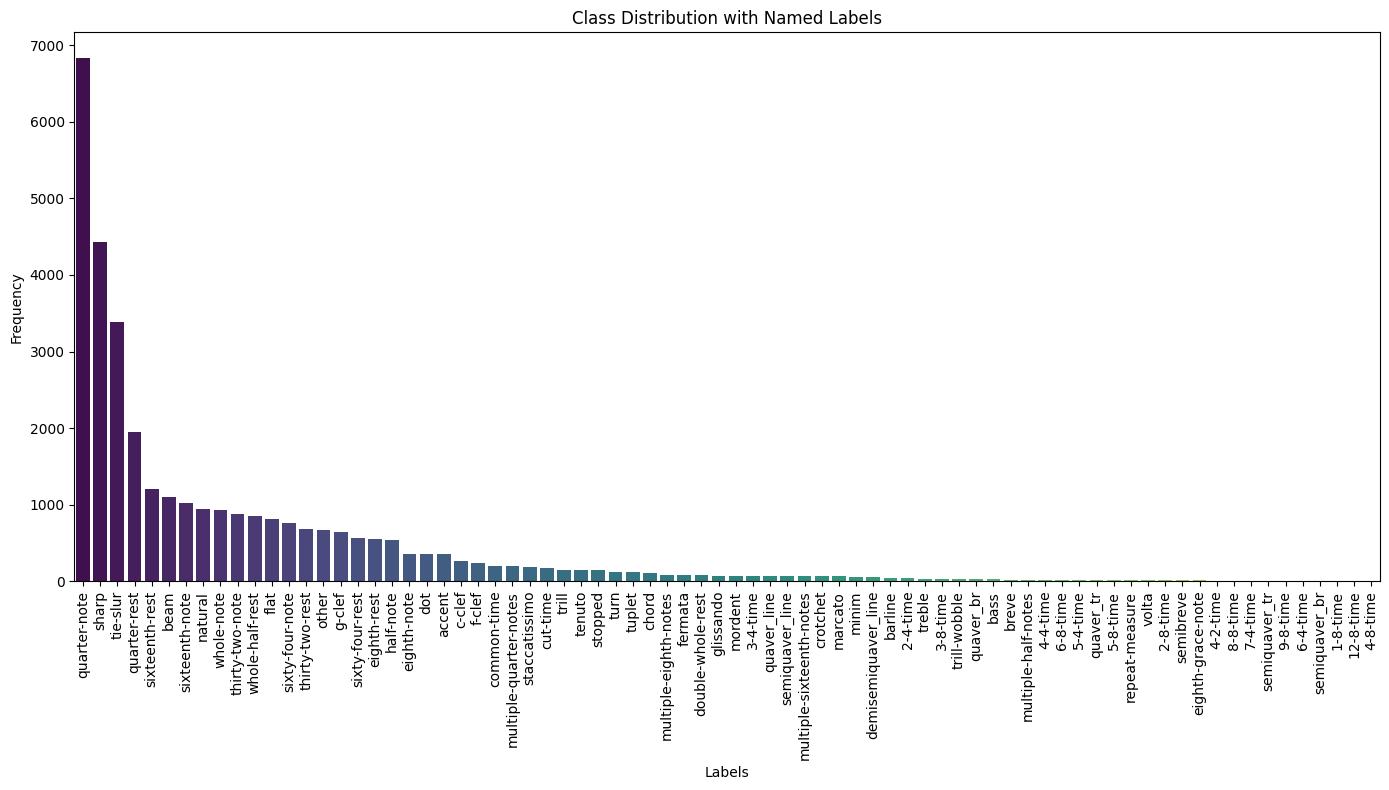

C:\Users\bruno\AppData\Local\Temp\ipykernel_16168\1917123848.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10_labels), y=list(top_10_counts), palette="viridis")


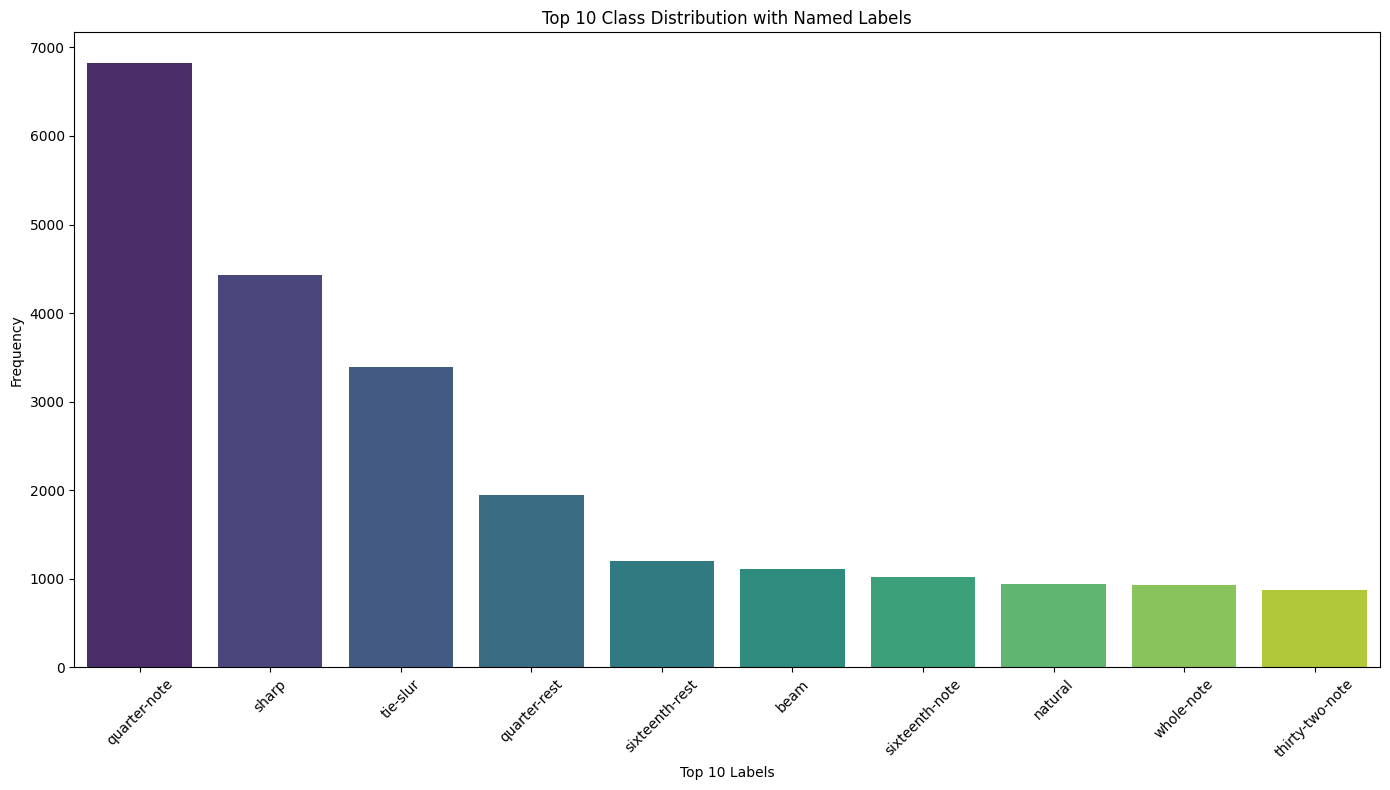

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de etiquetas proporcionada inicialmente
label_distribution_initial = Counter({
    70: 6829, 81: 4433, 91: 3386, 71: 1946, 83: 1200, 25: 1105, 82: 1019, 66: 938, 99: 926, 89: 874, 
    98: 856, 47: 817, 84: 763, 90: 685, 69: 667, 48: 643, 85: 559, 44: 547, 52: 543, 43: 354, 37: 353, 
    21: 353, 29: 268, 45: 235, 33: 203, 64: 192, 86: 186, 35: 177, 93: 145, 88: 145, 87: 140, 96: 123, 
    95: 121, 30: 100, 62: 82, 46: 82, 41: 79, 49: 73, 61: 72, 9: 69, 73: 68, 79: 67, 65: 67, 34: 64, 
    59: 61, 60: 56, 36: 48, 23: 39, 7: 34, 92: 30, 10: 26, 94: 22, 72: 22, 24: 21, 28: 18, 63: 18, 
    12: 17, 17: 15, 14: 13, 74: 12, 15: 12, 75: 11, 97: 11, 8: 10, 77: 9, 42: 9, 11: 6, 19: 6, 18: 5, 
    80: 5, 20: 3, 16: 2, 78: 2, 4: 1, 5: 1, 13: 1
})

# Mapeo index2letter proporcionado
index2letter = {
    0: 'PAD_TOKEN', 1: 'SOS_TOKEN', 2: 'EOS_TOKEN', 3: 'UNK_TOKEN', 4: '1-8-time', 5: '12-8-time', 6: '2-2-time', 
    7: '2-4-time', 8: '2-8-time', 9: '3-4-time', 10: '3-8-time', 11: '4-2-time', 12: '4-4-time', 13: '4-8-time', 
    14: '5-4-time', 15: '5-8-time', 16: '6-4-time', 17: '6-8-time', 18: '7-4-time', 19: '8-8-time', 20: '9-8-time', 
    21: 'accent', 22: 'arpeggio', 23: 'barline', 24: 'bass', 25: 'beam', 26: 'brace', 27: 'breath-mark', 28: 'breve', 
    29: 'c-clef', 30: 'chord', 31: 'coda', 32: 'coda-square', 33: 'common-time', 34: 'crotchet', 35: 'cut-time', 
    36: 'demisemiquaver_line', 37: 'dot', 38: 'dotted-horizontal-spanner', 39: 'double-flat', 40: 'double-sharp', 
    41: 'double-whole-rest', 42: 'eighth-grace-note', 43: 'eighth-note', 44: 'eighth-rest', 45: 'f-clef', 
    46: 'fermata', 47: 'flat', 48: 'g-clef', 49: 'glissando', 50: 'hairpin-crescendo', 51: 'hairpin-decrescendo', 
    52: 'half-note', 53: 'horizontal-spanner', 54: 'letter-f', 55: 'letter-m', 56: 'letter-p', 57: 'letter-s', 
    58: 'letter-z', 59: 'marcato', 60: 'minim', 61: 'mordent', 62: 'multiple-eighth-notes', 63: 'multiple-half-notes', 
    64: 'multiple-quarter-notes', 65: 'multiple-sixteenth-notes', 66: 'natural', 67: 'onehundred-twenty-eight-note', 
    68: 'onehundred-twenty-eight-rest', 69: 'other', 70: 'quarter-note', 71: 'quarter-rest', 72: 'quaver_br', 
    73: 'quaver_line', 74: 'quaver_tr', 75: 'repeat-measure', 76: 'segno', 77: 'semibreve', 78: 'semiquaver_br', 
    79: 'semiquaver_line', 80: 'semiquaver_tr', 81: 'sharp', 82: 'sixteenth-note', 83: 'sixteenth-rest', 
    84: 'sixty-four-note', 85: 'sixty-four-rest', 86: 'staccatissimo', 87: 'stopped', 88: 'tenuto', 
    89: 'thirty-two-note', 90: 'thirty-two-rest', 91: 'tie-slur', 92: 'treble', 93: 'trill', 94: 'trill-wobble', 
    95: 'tuplet', 96: 'turn', 97: 'volta', 98: 'whole-half-rest', 99: 'whole-note'
}

# Convertir la distribución de etiquetas utilizando index2letter
label_distribution_named = {index2letter[key]: value for key, value in label_distribution_initial.items()}

# Ordenar la distribución completa y la de top 10
sorted_labels_named = sorted(label_distribution_named.items(), key=lambda x: x[1], reverse=True)
labels_named, counts_named = zip(*sorted_labels_named)

top_10_labels_named = sorted_labels_named[:10]
top_10_labels, top_10_counts = zip(*top_10_labels_named)

# Crear el gráfico de distribución general
plt.figure(figsize=(14, 8))
sns.barplot(x=list(labels_named), y=list(counts_named), palette="viridis")
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution with Named Labels')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crear el gráfico de distribución top 10
plt.figure(figsize=(14, 8))
sns.barplot(x=list(top_10_labels), y=list(top_10_counts), palette="viridis")
plt.xlabel('Top 10 Labels')
plt.ylabel('Frequency')
plt.title('Top 10 Class Distribution with Named Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
